# Importamos librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Entender archivos

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,Unnamed: 0,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,456,Cabo Verde,2007,Developing,126.0,0,5.28,345.463714,96.0,0,...,4.30,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9,72.3
1,462,Cabo Verde,2001,Developing,152.0,0,3.81,150.743486,92.0,0,...,5.19,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0,73.0
2,2172,Saint Lucia,2011,Developing,143.0,0,10.43,0.000000,99.0,0,...,7.58,99.0,0.1,1766.947595,1386542.0,4.3,4.3,0.733,12.9,74.6
3,2667,Tunisia,2013,Developing,13.0,3,1.29,594.645310,98.0,16,...,7.26,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7,74.9
4,381,Brunei Darussalam,2002,Developing,95.0,0,0.13,941.703687,99.0,0,...,3.40,94.0,0.1,16846.219800,1386542.0,6.7,6.1,0.820,13.3,74.8


In [3]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Unnamed: 0,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2546,Syrian Arab Republic,2006,Developing,123.0,8,0.97,122.652333,83.0,517,...,83.0,3.78,8.0,0.1,1762.246170,18914977.0,6.4,6.3,0.636,11.4
1,650,Croatia,2006,Developed,113.0,0,11.83,1555.651986,92.0,1,...,96.0,6.95,96.0,0.1,11363.418450,444.0,1.8,1.8,0.783,13.9
2,1740,Montenegro,2007,Developing,125.0,0,4.98,678.518894,9.0,0,...,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,2.2,0.762,13.6
3,177,Bahrain,2014,Developing,7.0,0,1.57,367.255674,98.0,46,...,98.0,4.98,98.0,0.1,24983.379200,1386542.0,6.1,6.0,0.820,14.5
4,1377,Kenya,2000,Developing,428.0,77,1.51,0.681686,92.0,21002,...,8.0,4.68,82.0,18.1,43.979713,3145483.0,9.2,9.1,0.448,8.4


In [4]:
train_data.shape, test_data.shape

((2350, 23), (588, 22))

In [5]:
train_data.info()
# print('-'*80)
# test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2350 non-null   int64  
 1   Country                          2350 non-null   object 
 2   Year                             2350 non-null   int64  
 3   Status                           2350 non-null   object 
 4   Adult Mortality                  2350 non-null   float64
 5   infant deaths                    2350 non-null   int64  
 6   Alcohol                          2350 non-null   float64
 7   percentage expenditure           2350 non-null   float64
 8   Hepatitis B                      2350 non-null   float64
 9   Measles                          2350 non-null   int64  
 10   BMI                             2350 non-null   float64
 11  under-five deaths                2350 non-null   int64  
 12  Polio               

In [6]:
# # train_data.isna().sum()
# print('-'*80)
# test_data.isna().sum()

In [7]:
train_data.describe()

,Unnamed: 0,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,...,2350.000000,2350.000000,2350.000000,2350.000000,2.350000e+03,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000
mean,1477.608085,2007.537447,165.749787,28.793191,4.536911,720.521353,83.170213,2318.703404,38.613574,40.094468,...,5.921921,82.440000,1.787064,6559.900842,9.609107e+06,4.782979,4.820596,0.633644,12.043064,69.286766
std,847.461601,4.611986,125.066557,111.836006,3.902423,1952.616462,22.778758,11589.618520,19.965111,152.939537,...,2.409241,23.736519,5.266324,13256.540660,4.860792e+07,4.381124,4.460068,0.201977,3.254157,9.557714
min,0.000000,2000.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,...,0.650000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,745.500000,2004.000000,74.000000,0.000000,1.100000,5.491010,83.000000,0.000000,19.600000,0.000000,...,4.372500,78.000000,0.100000,564.088121,3.949550e+05,1.600000,1.600000,0.509000,10.300000,63.300000
50%,1486.500000,2008.000000,144.000000,3.000000,3.755000,65.611455,92.000000,16.000000,43.500000,4.000000,...,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,72.200000
75%,2207.750000,2012.000000,227.000000,20.750000,7.327500,441.534144,96.000000,356.250000,56.100000,26.000000,...,7.340000,97.000000,0.800000,4827.824542,4.671562e+06,7.075000,7.100000,0.773000,14.200000,75.700000
max,2936.000000,2015.000000,723.000000,1800.000000,17.310000,19099.045060,99.000000,212183.000000,87.300000,2500.000000,...,17.240000,99.000000,50.600000,115761.577000,1.293859e+09,27.700000,28.600000,0.948000,20.700000,89.000000


In [8]:
for col in train_data.columns:
    print(f"{col}: {train_data[col].nunique()} valores únicos")

Unnamed: 0: 2350 valores únicos
Country: 191 valores únicos
Year: 16 valores únicos
Status: 2 valores únicos
Adult Mortality: 409 valores únicos
infant deaths: 185 valores únicos
Alcohol: 989 valores únicos
percentage expenditure: 1871 valores únicos
Hepatitis B: 85 valores únicos
Measles : 797 valores únicos
 BMI : 584 valores únicos
under-five deaths : 228 valores únicos
Polio: 72 valores únicos
Total expenditure: 772 valores únicos
Diphtheria : 79 valores únicos
 HIV/AIDS: 185 valores únicos
GDP: 2006 valores únicos
Population: 1830 valores únicos
 thinness  1-19 years: 194 valores únicos
 thinness 5-9 years: 199 valores únicos
Income composition of resources: 602 valores únicos
Schooling: 167 valores únicos
Life expectancy : 353 valores únicos


In [9]:
train_data.duplicated().sum()

0

In [10]:
numeric_columns = train_data.select_dtypes(include=['number'])
numeric_column_names = numeric_columns.columns.tolist()
print("Numeric Column Names:", numeric_column_names)

Numeric Column Names: ['Unnamed: 0', 'Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Life expectancy ']


# Exploraciones de correlaciones

In [11]:
# Paso 1.1: Selección de columnas numéricas (excluir 'Unnamed: 0')
numeric_columns = train_data.select_dtypes(include=['number']).drop(columns=['Unnamed: 0'], errors='ignore')
print(numeric_columns)

      Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0     2007            126.0              0     5.28              345.463714   
1     2001            152.0              0     3.81              150.743486   
2     2011            143.0              0    10.43                0.000000   
3     2013             13.0              3     1.29              594.645310   
4     2002             95.0              0     0.13              941.703687   
...    ...              ...            ...      ...                     ...   
2345  2011             59.0              0     6.91             3601.287457   
2346  2010            287.0              4     3.21               53.307827   
2347  2007            266.0             17     6.08               56.778587   
2348  2003             72.0              2     9.30             3519.258515   
2349  2005             34.0              7     1.07                5.064689   

      Hepatitis B  Measles    BMI   under-five deat

In [12]:
# Paso 1.2: Calcular las correlaciones
correlation_matrix = numeric_columns.corr()

# Correlaciones de las variables con 'Life expectancy'
correlation_with_target = correlation_matrix['Life expectancy '].sort_values(ascending=False)

# Mostrar las correlaciones ordenadas
print("Correlaciones con 'Life expectancy':")
print(correlation_with_target)

Correlaciones con 'Life expectancy':
Life expectancy                    1.000000
Schooling                          0.707536
Income composition of resources    0.692532
 BMI                               0.553643
Diphtheria                         0.457728
Polio                              0.446091
GDP                                0.421106
Alcohol                            0.379759
percentage expenditure             0.374023
Total expenditure                  0.193657
Year                               0.175415
Hepatitis B                        0.153532
Population                        -0.024225
Measles                           -0.164995
infant deaths                     -0.202873
under-five deaths                 -0.228700
 thinness 5-9 years               -0.465351
 thinness  1-19 years             -0.465593
 HIV/AIDS                         -0.558070
Adult Mortality                   -0.702714
Name: Life expectancy , dtype: float64


- Variables fuertemente correlacionadas positivamente (r > 0.5):
  - `Schooling` (0.71): Más años de educación formal están altamente relacionados con una mayor esperanza de vida."
  -  `Income composition of resources` (0.69): Los recursos socioeconómicos (como ingresos y acceso a servicios) también son un factor clave.
  - `BMI` (0.55): El índice de masa corporal promedio está relacionado positivamente, indicando que un bajo BMI podría estar asociado a problemas de salud.
  
- Variables con correlaciones moderadas (0.3 < r < 0.5):
  - `Diphtheria` y `Polio` (0.45-0.46): La vacunación contra estas enfermedades muestra una relación clara con la esperanza de vida.
  - `GDP` (0.42): Un PIB más alto está asociado con una mayor esperanza de vida.
  - `Alcohol` y `percentage expenditure` (0.37-0.38): Factores como el gasto público en salud y el consumo moderado de alcohol también contribuyen.

- Variables negativamente correlacionadas (r < 0):
  - `Adult Mortality` (-0.70): Altas tasas de mortalidad adulta están inversamente relacionadas con la esperanza de vida.
  - `HIV/AIDS` (-0.56): La mortalidad por VIH/SIDA tiene un fuerte impacto negativo.
  - `thinness` (-0.46): Los porcentajes altos de delgadez indican problemas de salud relacionados con la nutrición.
  - `under-five deaths e infant deaths` (-0.22 a -0.20): Muertes infantiles y de menores de 5 años afectan negativamente.

- Variables con correlación baja o casi nula (r ≈ 0):
  - `Population` (-0.02): La población total no parece tener relación directa con la esperanza de vida.

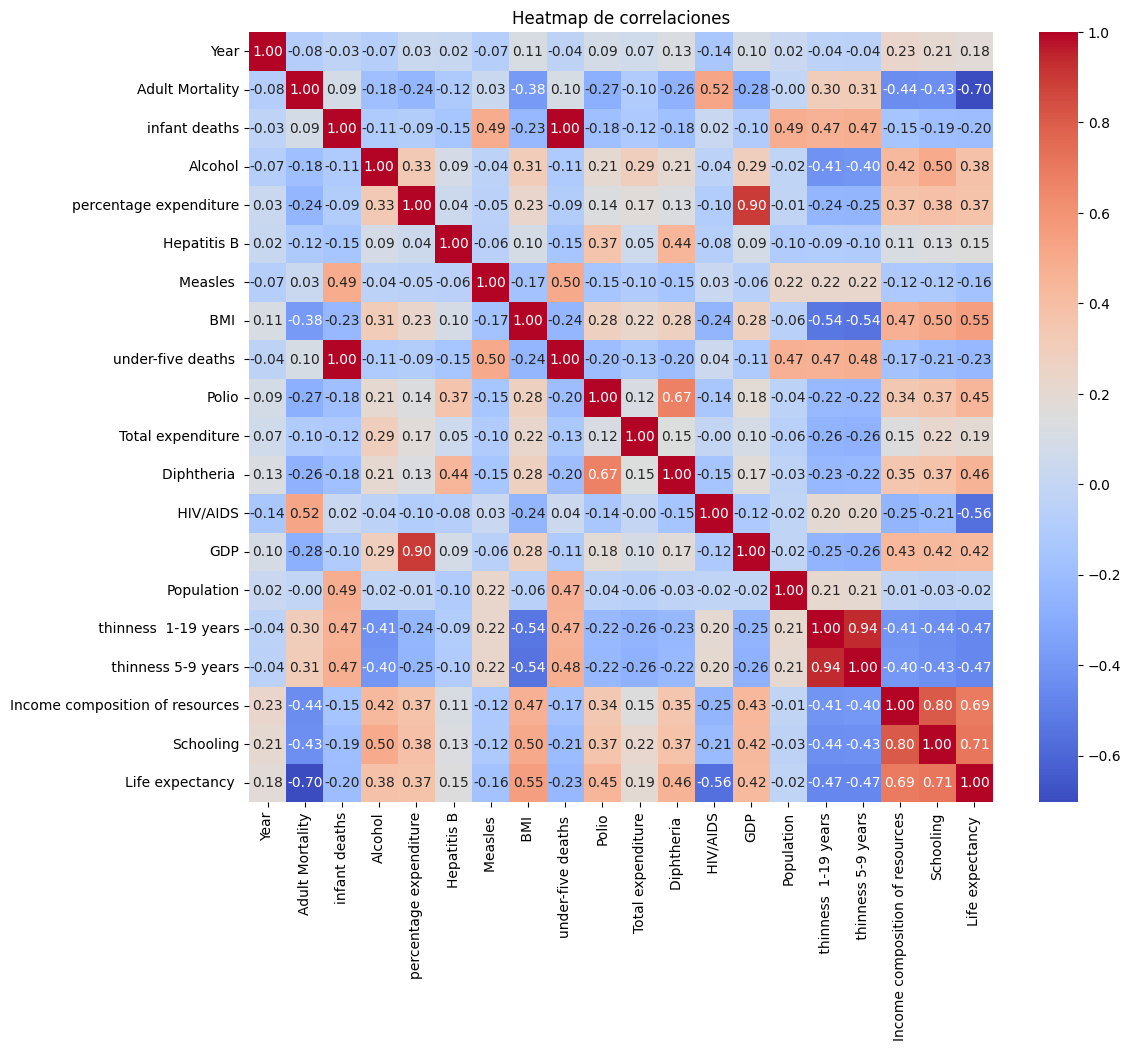

In [13]:
# Paso 1.3: Visualizar con un heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True) # annot sirve para saber si quieres mostrar los numeros dentro de los recuadros
plt.title('Heatmap de correlaciones')
plt.show()

# Preprocessing

In [14]:
# Paso 2.1: Manejar valores faltantes (NaN)
# Eliminar filas completamente vacías (si las hubiera)
train_data_cleaned = train_data.dropna(how='all')

# Eliminar los espacios en los nombres de las columnas para evitar errores con nombres mal escritos
train_data_cleaned.columns = train_data_cleaned.columns.str.strip()

# Reemplazar ceros por NaN en las columnas relevantes
columns_with_zeros = ['GDP', 'Population', 'Life expectancy', 'Adult Mortality', 'Hepatitis B', 'Alcohol', 
                      'Measles', 'infant deaths', 'under-five deaths', 'BMI', 'percentage expenditure', 
                      'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'Polio', 'Income composition of resources', 
                      'Schooling']

# Reemplazar ceros por NaN
train_data_cleaned[columns_with_zeros] = train_data_cleaned[columns_with_zeros].replace(0, np.nan)

# Eliminar filas con NaN en columnas críticas (las columnas con valores relevantes para el modelo)
train_data_cleaned = train_data_cleaned.dropna(subset=columns_with_zeros)

# Imputar los valores NaN restantes con la mediana para las columnas numéricas
imputer = SimpleImputer(strategy='median')
train_data_cleaned[columns_with_zeros] = imputer.fit_transform(train_data_cleaned[columns_with_zeros])

# Verificar si después de la imputación hay valores NaN
print("NaN después de la imputación:")
print(train_data_cleaned[columns_with_zeros].isna().sum())

NaN después de la imputación:
GDP                                0
Population                         0
Life expectancy                    0
Adult Mortality                    0
Hepatitis B                        0
Alcohol                            0
Measles                            0
infant deaths                      0
under-five deaths                  0
BMI                                0
percentage expenditure             0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
Polio                              0
Income composition of resources    0
Schooling                          0
dtype: int64


No hay valores nulo en el conjunto de datos

In [15]:
# Paso 2.2: Estandarizar/Escalar las columnas numéricas
# Seleccionamos las columnas numéricas para la estandarización
numeric_columns = train_data_cleaned.select_dtypes(include=['number']).columns.tolist()

# Estandarizar las columnas numéricas utilizando StandardScaler
scaler = StandardScaler()
train_data_cleaned[numeric_columns] = scaler.fit_transform(train_data_cleaned[numeric_columns])

# Verificar que la estandarización se realizó correctamente
print("Primeras filas después de la estandarización:")
print(train_data_cleaned[numeric_columns].head())

Primeras filas después de la estandarización:
   Unnamed: 0      Year  Adult Mortality  infant deaths   Alcohol  \
3    1.424911  1.412239        -1.266030      -0.304505 -0.638917   
5   -0.745417 -1.145163         0.937891      -0.304505  0.614778   
6    0.614019 -0.912672         0.848635      -0.254726 -0.824846   
7   -0.813389  0.947257        -0.455866      -0.279615  0.078239   
9    0.690338 -0.912672        -0.380343      -0.304505  1.424899   

   percentage expenditure  Hepatitis B   Measles       BMI  under-five deaths  \
3                0.025941     0.746188 -0.313359  1.358208          -0.318494   
5               -0.210236     0.495950 -0.312669 -0.749571          -0.313901   
6               -0.282697    -0.546704  0.018516  0.325292          -0.267968   
7               -0.138072     0.329126 -0.292569  0.943993          -0.295528   
9               -0.008595     0.704481 -0.310599  1.106533          -0.318494   

   ...  Total expenditure  Diphtheria  HIV/AIDS     

- Primeras filas después de la estandarización: Las columnas ahora están en una escala similar (media de 0 y desviación estándar de 1).

In [16]:
# Paso 2.3: Codificar variables categóricas (Status)
# # La columna 'Status' es categórica y la vamos a codificar usando One-Hot Encoding
# train_data_cleaned = pd.get_dummies(train_data_cleaned, columns=['Status'], drop_first=True)

# # Verificar si la codificación One-Hot Encoding se ha aplicado correctamente
# print("Primeras filas después de One-Hot Encoding de 'Status':")
# print(train_data_cleaned.head())

from sklearn.preprocessing import LabelEncoder

# Codificar 'Status' como ejemplo
label_encoder = LabelEncoder()
train_data['Status'] = label_encoder.fit_transform(train_data['Status'])

# Confirmar codificación
print("Valores únicos en 'Status' después de codificación:", train_data['Status'].unique())


Valores únicos en 'Status' después de codificación: [1 0]


In [17]:
# Paso 2.4: Dividir los datos en conjuntos de entrenamiento y validación/test
# Separamos las características (X) de la variable objetivo (y) 
X = train_data_cleaned.drop(columns=['Life expectancy'])  # Todas las columnas menos 'Life expectancy'
y = train_data_cleaned['Life expectancy']  # La columna 'Life expectancy'

# Dividimos los datos en conjunto de entrenamiento (80%) y conjunto de validación/test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar el tamaño de los conjuntos de entrenamiento y prueba
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de validación/test: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (774, 22)
Tamaño del conjunto de validación/test: (194, 22)


# Selección y entrenamiento de modelos

In [20]:
# Limpiar los nombres de las columnas eliminando espacios al principio y al final
test_data_cleaned = test_data_cleaned.columns.str.strip()

# Asegurarse de que las columnas de test_data_cleaned coincidan con las de X_train
test_data_cleaned = test_data_cleaned[X_train.columns]

# Verificar si todas las columnas necesarias están en test_data_cleaned
missing_columns = set(X_train.columns) - set(test_data_cleaned.columns)
if missing_columns:
    print("Columnas faltantes en test_data_cleaned:", missing_columns)
else:
    # Si todas las columnas necesarias están presentes, reordenamos las columnas de test_data_cleaned
    test_data_cleaned = test_data_cleaned[X_train.columns]

    # Ahora realizamos la predicción con el modelo entrenado
    y_pred_test = best_rf_model.predict(test_data_cleaned)  # Realizar las predicciones
    print("Predicciones realizadas correctamente.")

NameError: name 'test_data_cleaned' is not defined

In [ ]:
# Definir X (características) y y (target: 'Life expectancy')
X = train_data_cleaned.drop(columns=['Life expectancy', 'Unnamed: 0', 'Country'])  # Eliminamos 'Country' y otras columnas innecesarias
y = train_data_cleaned['Life expectancy']

# Convertir la columna 'Status' en variables dummy (esto convertirá 'Developing' en una columna binaria)
X = pd.get_dummies(X, drop_first=True)  # drop_first=True para evitar multicolinealidad

# Verificación de tipos de datos
print(X.dtypes)  # Ahora todo debería ser numérico
print('-'*80)
# Dividir los datos en conjunto de entrenamiento (80%) y conjunto de validación/test (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Ver las primeras filas después del preprocesamiento
print(X_train.head())

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Definir los modelos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=300, random_state=42)
}

# Diccionario para almacenar los resultados
results = {}

# Entrenamos y evaluamos cada modelo
for model_name, model in models.items():
    try:
        # Entrenamos el modelo
        model.fit(X_train, y_train)
        
        # Hacemos las predicciones
        y_pred = model.predict(X_val)
        
        # Calculamos el RMSE y el R²
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        r2 = r2_score(y_val, y_pred)
        
        # Almacenamos los resultados
        results[model_name] = {'RMSE': rmse, 'R²': r2}
    except Exception as e:
        print(f"Error al entrenar el modelo {model_name}: {e}")

# Imprimir los resultados
print("Resultados de los Modelos:")
for model_name, metrics in results.items():
    print(f"{model_name}: RMSE = {metrics['RMSE']:.4f}, R² = {metrics['R²']:.4f}")

# Optimizacion del modelo con GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Definir el modelo base
rf = RandomForestRegressor(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [None, 10, 20, 30],   # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],   # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],     # Número mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2', None]  
}

print(test_data_cleaned.shape)

# Aplicar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Entrenar el modelo optimizado con los mejores parámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:", best_params)

# Evaluar el modelo optimizado
best_rf_model = grid_search.best_estimator_

# Predicciones
y_pred = best_rf_model.predict(X_val)
print(len(y_pred_test))  # Debe ser igual al número de filas de test_data_cleaned

# Calcular RMSE y R²
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"Optimización de Random Forest con GridSearchCV - RMSE: {rmse:.4f}, R²: {r2:.4f}")

In [ ]:
print("Tamaño del conjunto de prueba:", test_data.shape)
print("Tamaño de las predicciones:", y_pred_test.shape)

# Crear predicciones

In [ ]:
# Crear un DataFrame con las predicciones
predictions_df = pd.DataFrame({
    'Country': test_data['Country'],  # Usar la columna 'Country' original del conjunto de test
    'Life expectancy': y_pred_test
})
predictions_df.to_csv('predicciones.csv', index=False)

print("Archivo de predicciones guardado como 'predicciones.csv'")
